In [393]:
# Timothy Fischer, g19f7919

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

seed = 42


# Task 1: Cleaning your data [10 Marks]


In [394]:
dataset = pd.read_csv("winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [395]:
# Check for missing values...

print("Missing values per feature:")
display(dataset.isna().sum())

Missing values per feature:


fixed acidity            0
volatile acidity        22
citric acid             44
residual sugar          44
chlorides               50
free sulfur dioxide     71
total sulfur dioxide    98
density                 76
pH                      76
sulphates               21
alcohol                  0
quality                  0
dtype: int64

In [396]:
# Fill in missing values with median

if dataset.isnull().sum().sum() > 0:
    print("There were missing values!.. It's fixed now :)")
    dataset = dataset.fillna(dataset.median())
else:
    print("No missing values found :)")

There were missing values!.. It's fixed now :)


- The given cleaned.py code was missing the data cleaning step for best practices.
- From here, we would split the data into training and testing and then perform EDA on the testing data only.

# Task 2: Scaling your data [25 Marks]

In [397]:
# Question 1 & 2: Split data into training and testing samples

X = dataset.iloc[:, 0:-1] 
y = dataset.iloc[:,-1]

# Use 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=seed)

# Initialize model
model = KNeighborsClassifier(n_neighbors=1)

In [398]:
# Question 3: Scale data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test) 

In [399]:
# Question 4: Cross-Validation

cv_results = cross_validate(model, X_train_scaled, y_train, cv=5, scoring=('accuracy', 'f1_weighted'))

print("Cross Validation Results: \n")
print(f"Accuracy score: {round(cv_results['test_accuracy'].mean(), 2)}")
print(f"Weighted f1 score: {round(cv_results['test_f1_weighted'].mean(), 2)}")

Cross Validation Results: 

Accuracy score: 0.61
Weighted f1 score: 0.6


In [400]:
# train and produce classification report

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.15      0.18      0.16        17
           5       0.62      0.63      0.62       195
           6       0.52      0.47      0.49       200
           7       0.43      0.46      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.51       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.53      0.51      0.52       480



In [401]:
# Question 5: Bin the target variables

y_train_binned = pd.cut(y_train, bins=3, labels=['Low', 'Medium', 'High'])
y_test_binned = pd.cut(y_test, bins=3, labels=['Low', 'Medium', 'High'])

In [402]:
# Question 6: Highest Weighted f1 score

cv_results = cross_validate(model, X_train_scaled, y_train_binned, cv=5, scoring=('f1_weighted'))

print("Cross Validation Results: \n")
print(f"Weighted f1 score: {round(cv_results['test_score'].mean(), 2)}")

Cross Validation Results: 

Weighted f1 score: 0.82


In [403]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_scaled, y_train_binned)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test_binned, y_pred))

              precision    recall  f1-score   support

        High       0.49      0.57      0.52        67
         Low       0.20      0.28      0.23        18
      Medium       0.89      0.85      0.87       395

    accuracy                           0.79       480
   macro avg       0.53      0.56      0.54       480
weighted avg       0.81      0.79      0.80       480



In [404]:
# Question 7: Highest Macro f1 score

cv_results = cross_validate(model, X_train_scaled, y_train_binned, cv=5, scoring=('f1_macro'))

print("Cross Validation Results: \n")
print(f"Macro f1 score: {round(cv_results['test_score'].mean(), 2)}")

Cross Validation Results: 

Macro f1 score: 0.53


# Task 3: Best Features [20 Marks]

In [405]:
dataset = pd.read_csv("winequality-red.csv")\

if dataset.isnull().sum().sum() > 0:
    dataset = dataset.fillna(dataset.median())

X = dataset.iloc[:, 0:-1] 
y = dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=seed)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test) 

In [406]:
# Use SelectKbest to select the the best features

selector = SelectKBest(score_func=chi2, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_train_binned)
feature_names = X_train.columns[selector.get_support(indices=True)]

# slecting the same features for the test data
X_test_new = pd.DataFrame(X_test_scaled)
X_test_new.columns = X_test.columns
X_test_new = X_test_new[feature_names]

In [407]:
# Cross Validation

# Using k=4 for KNN seems to produce best result
model = KNeighborsClassifier(n_neighbors=4)
cv_results = cross_validate(model, X_train_selected, y_train_binned, cv=5, scoring=('f1_macro'))

print("Cross Validation Results: \n")
print(f"Macro f1 score: {round(cv_results['test_score'].mean(), 2)}")

Cross Validation Results: 

Macro f1 score: 0.53


In [408]:
model.fit(X_train_selected, y_train_binned)
y_pred = model.predict(X_test_new)
print(classification_report(y_test_binned, y_pred))

              precision    recall  f1-score   support

        High       0.38      0.52      0.44        67
         Low       0.41      0.39      0.40        18
      Medium       0.89      0.83      0.86       395

    accuracy                           0.77       480
   macro avg       0.56      0.58      0.57       480
weighted avg       0.80      0.77      0.78       480



C:\Users\timfi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# Task 4: Making a medical diagnosis [35 marks]

In [409]:
dataset = load_breast_cancer(as_frame=True)

X = dataset.data
y = dataset.target

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [410]:
# Scale the data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [411]:
# Perform Principal Component Analysis on all the features

pca = PCA(n_components=2).fit_transform(X_scaled)

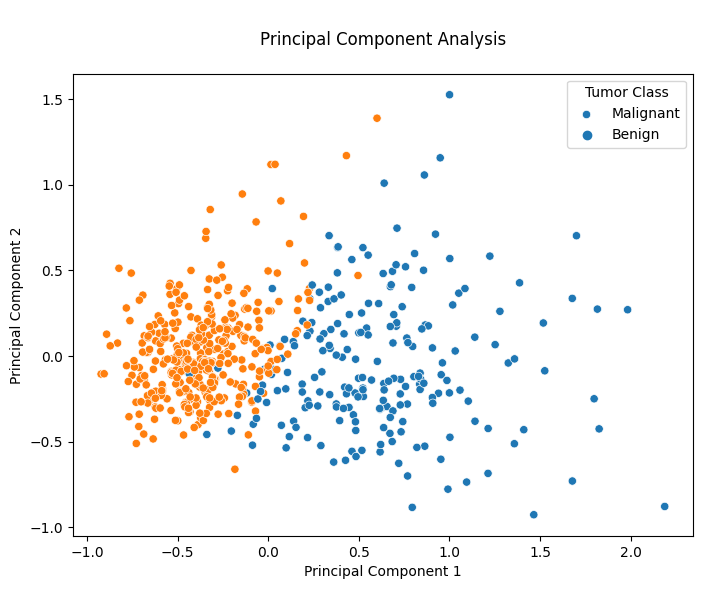

In [412]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca[:,:-1].flatten(), y=pca[:,1:].flatten(), hue=y).set_title("\nPrincipal Component Analysis\n")
plt.legend(title="Tumor Class", loc="upper right", labels=['Malignant', 'Benign'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# I don't know why the legend colors are both blue :(

In [413]:
# Cross Validation with the following models

models = {(KNeighborsClassifier(n_neighbors=3), "KNN"),
          (LogisticRegression(), "Logistic"),
          (DecisionTreeClassifier(criterion="gini"), "Descision Tree")}

print("Macro f1 Scores: \n")
for model, name in models:
    results = cross_validate(model, pca, y, cv=10, scoring=(('f1_macro')))
    print(f"{name} : {round(results['test_score'].mean(), 2)}")

Macro f1 Scores: 

Logistic : 0.94
Descision Tree : 0.92
KNN : 0.93
